In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing

# 1)

In [2]:
#reading the data set in python
df = pd.read_csv(r'C:\Users\perei\OneDrive\Desktop\Datasets-20211109\titanic_dataset.csv')

# 2)

In [3]:
#setting the index to column named PassengerId
df.set_index('PassengerId',inplace=True)

# 3)

In [4]:
#displaying some values of the dataset
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#getting to know how many rows and columnsare there in the dataset
df.shape

(891, 11)

In [6]:
# getting some basic information regarding the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
#displaying basic statistics like mean,standard deviation,median,minimum ,maximum values etc
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4)

In [8]:
# getting to know how many null values are there in the data set
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)# null values of the age column is filled with mean
                                            # we cannot drop the whole column as such because pn;y 177 rows have missing values

In [10]:
df=df.drop('Cabin',axis=1)# we drop this column because more than 50% of values in this column is missing

In [11]:
df['Embarked'].fillna(method='bfill',inplace=True)
# in Embarked column missing value is filled with the value which is just below it

In [12]:
# again checking for null values
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

it can be seen that now our data set is free of missing values and now we can move on to furthur steps of preprocessing

In [13]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [14]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 5)

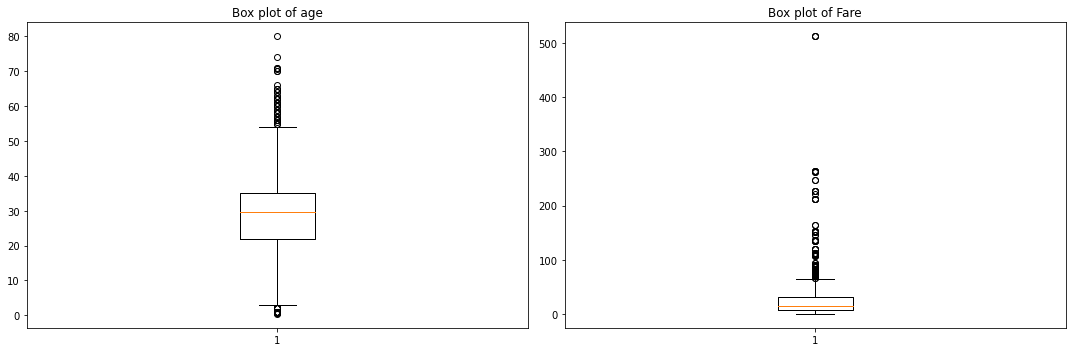

In [15]:
plt.figure(figsize = (15,5))

#boxplot for Age column
plt.subplot(1,2,1)
plt.boxplot(df['Age'])
plt.title('Box plot of age')

#boxplot for Fare column
plt.subplot(1,2,2)
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')



plt.tight_layout()
plt.show()

In [16]:
#calculating Q!,Q2.Q3,IQR,lower limit and upper limit for Ages
Q1 = np.percentile(df['Age'],25,interpolation = 'midpoint')
Q2 = np.percentile(df['Age'],50,interpolation = 'midpoint')
Q3 = np.percentile(df['Age'],75,interpolation = 'midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
print('IQR=',IQR)
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('upper limit =',upper_lim)
print('lower limit =',low_lim)

Q1= 22.0
Q2= 29.69911764705882
Q3= 35.0
IQR= 13.0
upper limit = 54.5
lower limit = 2.5


In [17]:
outliers=[]
for i in df['Age']:
    if ((i<low_lim)or(i>upper_lim)):
        outliers.append(i)
print('outliers=',outliers)        

outliers= [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


So here we have a lot of values that are outliers.There are lot of methods to handle the outliers.One way would be to drop the values but here since we have a lot of outliers dropping it would not be the best option.Next one would be to replace all the outliers with mean or median.But here we can do the quantile based flooring and capping which converts every values that are above upper limit to become equal to upper limit and every values which are lower than lower limit to become equal to lower limit. 

In [18]:
#capping/flooring the outlier at the upper and lower limits
df['Age'] = np.where(df['Age']>upper_lim,math.floor(upper_lim),
                                     np.where(df['Age']<low_lim,math.ceil(low_lim),df['Age'])).astype(int)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S


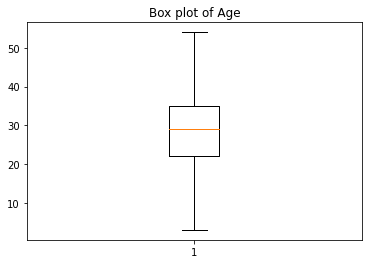

In [19]:
#checking whether the outliers were handled succesfully or not
plt.boxplot(df['Age'])
plt.title('Box plot of Age')
plt.show()

In [20]:
#calculating Q!,Q2.Q3,IQR,lower limit and upper limit for Fare
Q1 = np.percentile(df['Fare'],25,interpolation = 'midpoint')
Q2 = np.percentile(df['Fare'],50,interpolation = 'midpoint')
Q3 = np.percentile(df['Fare'],75,interpolation = 'midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
print('IQR=',IQR)
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('upper limit =',upper_lim)
print('lower limit =',low_lim)

Q1= 7.9104
Q2= 14.4542
Q3= 31.0
IQR= 23.0896
upper limit = 65.6344
lower limit = -26.724


In [21]:
outliers=[]
for i in df['Fare']:
    if ((i<low_lim)or(i>upper_lim)):
        outliers.append(i)
print('outliers=',outliers)        

outliers= [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


So here also we have a lot of outliers which are greater than the upper limit and no values which are lower than the lower limit.Here also it would be best to do the quantile based flooring and ceiling rather than dropping them altogether.

In [22]:
#capping/flooring the outlier at the upper and lower limits
df['Fare'] = np.where(df['Fare']>upper_lim,math.floor(upper_lim),
                                     np.where(df['Fare']<low_lim,math.ceil(low_lim),df['Fare'])).astype(int)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23,S


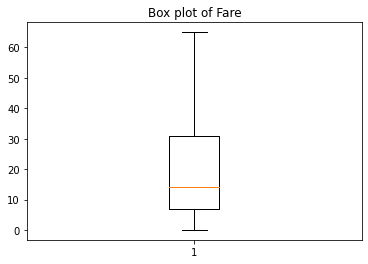

In [23]:
#checking whether the outliers were handled succesfully or not
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')
plt.show()

outlier detection and handling cannot be done in other columns as they are unique or categorical.

# 6)

In [24]:
df.Name.nunique()#Sonce there are 891 unique values we should drop the column Name

891

In [25]:
df1=df.drop('Name',axis = 1)#dropping the column Name

In [26]:
df1.Ticket.nunique()#checking how many unique values does column Ticket have

681

In [27]:
df1=df1.drop('Ticket',axis= 1)# Since there are 681 values we should drop it

In [28]:
df1=pd.get_dummies(df1,columns=['Sex','Embarked'])# using one_hot_encoding on the columns Sex snd Embarked


In [29]:
df1#displaying the dataFrame

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22,1,0,7,0,1,0,0,1
2,1,1,38,1,0,65,1,0,1,0,0
3,1,3,26,0,0,7,1,0,0,0,1
4,1,1,35,1,0,53,1,0,0,0,1
5,0,3,35,0,0,8,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27,0,0,13,0,1,0,0,1
888,1,1,19,0,0,30,1,0,0,0,1
889,0,3,29,1,2,23,1,0,0,0,1


In [30]:
#splitting the dataset in a such a way that Survived istarget and rest is the feature set
X=df1.drop('Survived',axis = 1)
y=df1['Survived']

In [31]:
X.describe()#displaying the statistic of feature set

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.218855,0.523008,0.381594,23.601571,0.352413,0.647587,0.189675,0.086420,0.723906
std,0.836071,11.980993,1.102743,0.806057,20.445641,0.477990,0.477990,0.392264,0.281141,0.447315
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,8.000000,6.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))#storing the minmax scaler from sklearn to a variable

In [33]:
X=min_max.fit_transform(X)#transforming the featureset using minmaxscaler

In [34]:
X=pd.DataFrame(X)#converting X into a DataFrame

In [35]:
X.describe()#showing the statistics of transformed feature set

,0,1,2,3,4,5,6,7,8,9
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.514095,0.065376,0.063599,0.363101,0.352413,0.647587,0.189675,0.086420,0.723906
std,0.418036,0.234921,0.137843,0.134343,0.314548,0.477990,0.477990,0.392264,0.281141,0.447315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.372549,0.000000,0.000000,0.107692,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.509804,0.000000,0.000000,0.215385,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.627451,0.125000,0.000000,0.476923,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
